## Indian Food Classification

Given *data about different Indian dishes*, let's try to predict a given dish is **vegetarian** or not.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/nehaprabhavalkar/indian-food-101

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

2025-05-23 22:51:43.113525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('indian_food.csv')
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


### Preprocessing

In [3]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [4]:
food_vocab = set()

for ingredients in data['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [5]:
food_vocab

{'all purpose flour',
 'almond',
 'almonds',
 'aloo',
 'alum powder',
 'amaranth leaves',
 'amchur powder',
 'apricots',
 'arbi ke patte',
 'arhar dal',
 'arrowroot powder',
 'atta',
 'avocado oil',
 'axone',
 'baby corn',
 'baby potatoes',
 'badam',
 'baingan',
 'baking powder',
 'baking soda',
 'banana',
 'banana flower',
 'basmati rice',
 'bay leaf',
 'beans',
 'beaten rice flakes',
 'beef',
 'beetroot',
 'bell pepper',
 'bell peppers',
 'bengal gram flour',
 'besan',
 'besan flour',
 'bhatura',
 'bhuna chana',
 'biryani masala',
 'biryani masala powder',
 'bitter gourd',
 'black lentils',
 'black pepper',
 'black salt',
 'black sesame seeds',
 'blend rice',
 'boiled pork',
 'boiled potatoes',
 'bombay duck',
 'bombay rava',
 'boondi',
 'bottle gourd',
 'bread crumbs',
 'brinjal',
 'brown rice',
 'brown rice flour',
 'butter',
 'cabbage',
 'canned coconut milk',
 'capsicum',
 'cardamom',
 'cardamom pods',
 'cardamom powder',
 'carrot',
 'carrots',
 'cashew nuts',
 'cashews',
 'cashe

In [6]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(data['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [7]:
len(food_vocab)

365

In [8]:
food_columns

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
data.drop(['name', 'ingredients'], axis=1, inplace=True)

In [10]:
data

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,vegetarian,45,25,sweet,dessert,West Bengal,East
1,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,vegetarian,15,60,sweet,dessert,Punjab,North
3,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...
250,vegetarian,5,30,sweet,dessert,Assam,North East
251,vegetarian,20,60,sweet,dessert,Goa,West
252,vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [11]:
{column: data[column].unique() for column in data.columns}

{'diet': array(['vegetarian', 'non vegetarian'], dtype=object),
 'prep_time': array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
        120,  60, 500, 150, 360, 495,  70,  35,  12]),
 'cook_time': array([ 25,  30,  60,  40,  50,  20,   5,  45, 120,  35,  90,  75,  15,
        720,  55,  -1,  10,   2,   6]),
 'flavor_profile': array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object),
 'course': array(['dessert', 'main course', 'starter', 'snack'], dtype=object),
 'state': array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
        'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
        'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
        'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
        'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
        'Goa'], dtype=object),
 'region': array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
        nan], dtype=object)}

In [12]:
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace("-1", np.NaN)

In [13]:
{column: data[column].unique() for column in data.columns}

{'diet': array(['vegetarian', 'non vegetarian'], dtype=object),
 'prep_time': array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
        120,  60, 500, 150, 360, 495,  70,  35,  12]),
 'cook_time': array([ 25,  30,  60,  40,  50,  20,   5,  45, 120,  35,  90,  75,  15,
        720,  55,  -1,  10,   2,   6]),
 'flavor_profile': array(['sweet', 'spicy', 'bitter', nan, 'sour'], dtype=object),
 'course': array(['dessert', 'main course', 'starter', 'snack'], dtype=object),
 'state': array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', nan,
        'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
        'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
        'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
        'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
        'Goa'], dtype=object),
 'region': array(['East', 'West', 'North', nan, 'North East', 'South', 'Central'],
       dtype=object)}

In [14]:
def onehot_encode(df, columns, prefixes): 
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [15]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

In [16]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45,25,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15,40,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,-1,-1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20,45,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [18]:
data['prep_time'] = data['prep_time'].fillna(data['prep_time'].mean())
data['cook_time'] = data['cook_time'].fillna(data['cook_time'].mean())

In [19]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
label_encoder = LabelEncoder()

data['diet'] = label_encoder.fit_transform(data['diet'])

In [21]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,1,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,1,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,1,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,1,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}

In [23]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,1,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,1,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,1,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,1,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Splitting and Scaling
y = data['diet']
X = data.drop('diet', axis=1)
X_food = pd.concat([X, food_columns], axis=1)

In [25]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size=0.7, random_state=42)

### Training (No ingredient features)

In [27]:
def build_model(num_features, hidden_layer_sizes=(64,64)):
    inputs = tf.keras.Input(shape=(num_features, ))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = [
            'accuracy',
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    return model

In [28]:
X.shape

(255, 40)

In [29]:
model = build_model(num_features=40, hidden_layer_sizes=(128,128))

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

2025-05-23 22:51:47.575505: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
3/3 [==============================] - 1s 268ms/step - loss: 0.6043 - accuracy: 0.8169 - auc: 0.2941 - val_loss: 0.3988 - val_accuracy: 0.9444 - val_auc: 0.7721 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4713 - accuracy: 0.8592 - auc: 0.6201 - val_loss: 0.3092 - val_accuracy: 0.9444 - val_auc: 0.9779 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.4028 - accuracy: 0.8592 - auc: 0.7678 - val_loss: 0.2481 - val_accuracy: 0.9444 - val_auc: 0.9779 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 0.3571 - accuracy: 0.8592 - auc: 0.8072 - val_loss: 0.2036 - val_accuracy: 0.9444 - val_auc: 0.9853 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3236 - accuracy: 0.8662 - auc: 0.8293 - val_loss: 0.1712 - val_accuracy: 0.9722 - val_auc: 1.0000 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 0s 76ms/step - loss: 0.

### Results

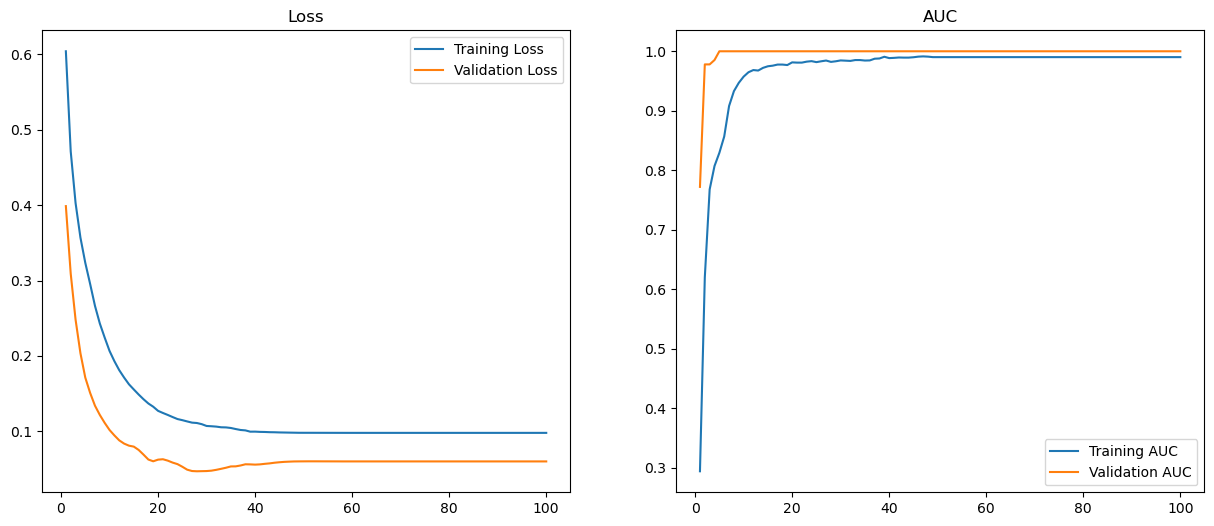

In [30]:
plt.figure(figsize=(15, 6))

epochs_range = range(1, epochs + 1)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

In [31]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 11ms/step - loss: 0.4473 - accuracy: 0.8442 - auc: 0.6918


[0.44732993841171265, 0.8441558480262756, 0.6918367147445679]

### Re-training with Food ingredient features

In [32]:
X_food.shape

(255, 405)

In [55]:
food_model = build_model(num_features=405, hidden_layer_sizes=(128,128))

food_batch_size = 64
food_epochs = 200

food_history = food_model.fit(
    X_food_train,
    y_food_train,
    validation_split=0.2,
    batch_size=food_batch_size,
    epochs=food_epochs
)

Epoch 1/200
3/3 [==============================] - 2s 388ms/step - loss: 0.8828 - accuracy: 0.3239 - auc: 0.3951 - val_loss: 0.4982 - val_accuracy: 0.8333 - val_auc: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 53ms/step - loss: 0.4608 - accuracy: 0.8451 - auc: 0.5180 - val_loss: 0.3048 - val_accuracy: 0.9444 - val_auc: 0.5515
Epoch 3/200
3/3 [==============================] - 0s 54ms/step - loss: 0.3961 - accuracy: 0.8592 - auc: 0.6148 - val_loss: 0.2482 - val_accuracy: 0.9444 - val_auc: 0.6029
Epoch 4/200
3/3 [==============================] - 0s 45ms/step - loss: 0.3423 - accuracy: 0.8592 - auc: 0.8100 - val_loss: 0.2319 - val_accuracy: 0.9444 - val_auc: 0.6765
Epoch 5/200
3/3 [==============================] - 0s 71ms/step - loss: 0.2664 - accuracy: 0.8662 - auc: 0.9412 - val_loss: 0.2323 - val_accuracy: 0.9444 - val_auc: 0.8235
Epoch 6/200
3/3 [==============================] - 0s 71ms/step - loss: 0.1938 - accuracy: 0.9014 - auc: 0.9951 - val_loss: 0.2448 - val_ac

### Results

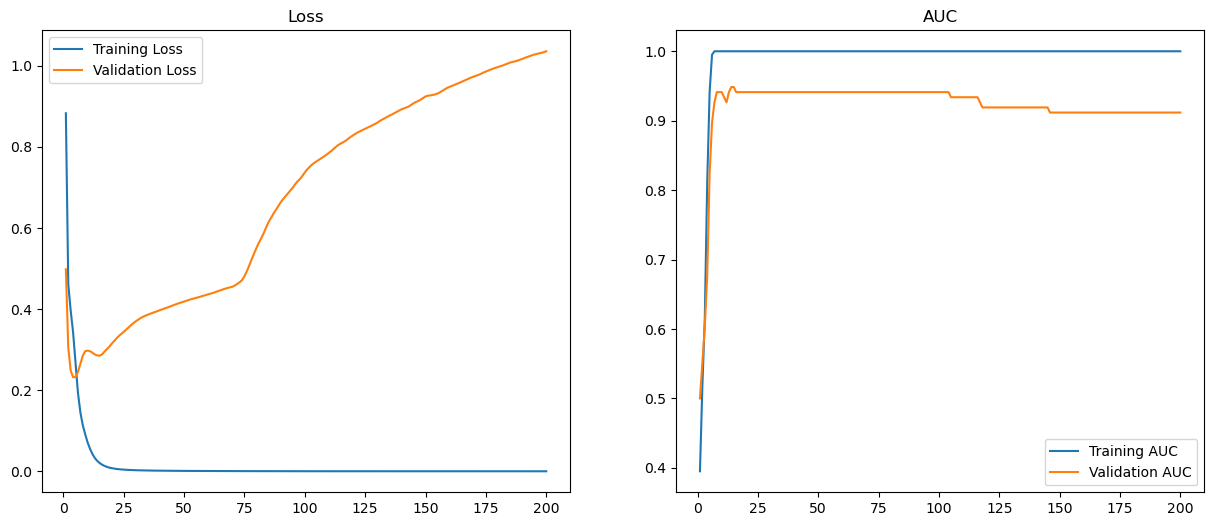

In [56]:
plt.figure(figsize=(15, 6))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(food_epochs_range, food_train_loss, label="Training Loss")
plt.plot(food_epochs_range, food_val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(food_epochs_range, food_train_auc, label="Training AUC")
plt.plot(food_epochs_range, food_val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

In [57]:
np.argmin(food_val_loss), np.argmax(food_val_auc)

(3, 14)

In [58]:
food_model.evaluate(X_food_test, y_food_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.7299 - accuracy: 0.7922 - auc: 0.8653


[0.729939877986908, 0.7922077775001526, 0.8653061389923096]